In [211]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

TO DO:

* ~~normalize the time series before taking the correlation~~
* ✓ use normalized correlation measure
* ✓ do a partitioning based on similarity
* ✓ sort adjacency matrix based on similarity
* ✓ visualize the partition
* convolve the time series with a declining 'response time'
* use a better correlation metric--do the math correctly

In [212]:
%matplotlib inline

Resources for this:

http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html  !!!

http://www.fil.ion.ucl.ac.uk/~wpenny/course/array.pdf
http://stats.stackexchange.com/questions/29096/correlation-between-two-time-series
http://perso.crans.org/aynaud/communities/api.html

In [213]:
from bigbang.archive import Archive

arx = Archive("ipython-dev",archive_dir="../archives")

Get the activity of a list

In [214]:
act = arx.get_activity()

Since are going to be computing correlations between N different time series data sets and that's an $O(N^2)$ operation, let's limit N.

In [215]:
cutoff = 10

def filtered_participants(cutoff):
    xc = act.sum() > 10
    ffc = [l for l in xc.keys() if xc[l]]
    return ffc

filtered_participants(cutoff)[:10]

['Chris.Barker@noaa.... (Christopher Barker)',
 'Fernando.Perez at colorado.edu (Fernando Perez)',
 'Fernando.Perez at colorado.edu (Fernando.Perez at colorado.edu)',
 'Fernando.Perez at colorado.edu (Fernando.Perez@colorado.edu)',
 'Fernando.Perez@berkeley.... (Fernando Perez)',
 'JDM@MarchRay.... (Jonathan March)',
 'Nicolas.Rougier@loria... (Nicolas Rougier)',
 "aaron.oleary@gmail.... (Aaron O'Leary)",
 'alessandro.gagliardi@glassdoor.... (Alessandro Gagliardi)',
 'alimanfoo@googlemail.... (Alistair Miles)']

In [216]:
from scipy.stats.stats import pearsonr  

fc = filtered_participants(cutoff)

n = len(fc)

pc = np.zeros([n,n])

for i in range(0,n):
    for j in range(i,n):
        si = act[fc[i]]
        sj = act[fc[j]]

        c = pearsonr(si,sj)[0]
        pc[i,j] = c
        pc[j,i] = c
        
pc

array([[ 1.        , -0.00615556, -0.00138937, ..., -0.00347863,
        -0.00183619, -0.00209406],
       [-0.00615556,  1.        ,  0.072759  , ..., -0.01620391,
        -0.00855322, -0.0097544 ],
       [-0.00138937,  0.072759  ,  1.        , ..., -0.00365739,
        -0.00193055, -0.00220167],
       ..., 
       [-0.00347863, -0.01620391, -0.00365739, ...,  1.        ,
         0.07121501,  0.0173109 ],
       [-0.00183619, -0.00855322, -0.00193055, ...,  0.07121501,
         1.        ,  0.3982642 ],
       [-0.00209406, -0.0097544 , -0.00220167, ...,  0.0173109 ,
         0.3982642 ,  1.        ]])

In [217]:
G = nx.Graph(pc)
labels = dict(enumerate(fc))
G = nx.relabel_nodes(G,labels)

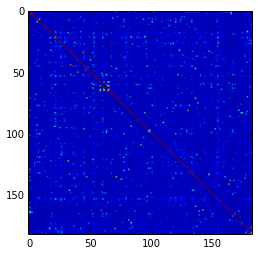

In [218]:
plt.imshow(pc)

In [219]:
# from http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[],cmap="Greys"):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap=cmap,
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    current_idx = 0
    for partition, color in zip(partitions, colors):
        #for module in partition:
        ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                      len(partition), # Width
                                      len(partition), # Height
                                      facecolor="none",
                                      edgecolor=color,
                                      linewidth="1"))
        current_idx += len(partition)

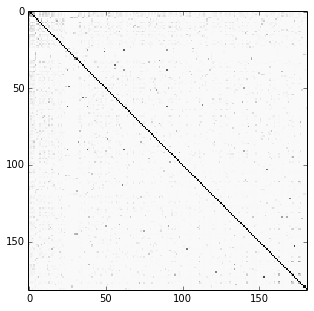

In [220]:
# order nodes by number of messages sent by each participant
o = list(act[fc].sum().order(ascending=False).keys())
draw_adjacency_matrix(G,node_order=o)

In [221]:
from sklearn import cluster

sc = cluster.SpectralClustering(n_clusters=4)
partition = sc.fit_predict(pc)
partition_order = [fc[x] for x in np.argsort(partition)]

In [222]:
np.sort(partition)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3], dtype=int32)

In [223]:
from collections import defaultdict

parts = defaultdict(list)
for i in range(len(partition)):
    parts[partition[i]].append(fc[i])
    
colors = [plt.cm.hsv(1. / (k + 1)) for k in parts.keys()]

In [224]:
colors

[(1.0, 0.0, 0.09375, 1.0),
 (0.0, 1.0, 0.96470316317617644, 1.0),
 (0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0),
 (0.51764557646910592, 1.0, 0.0, 1.0)]

In [225]:
len(parts.values())

4

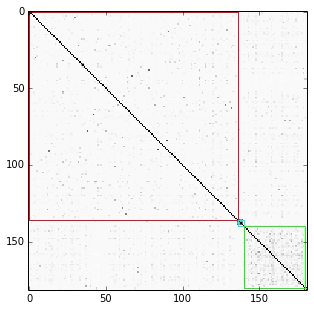

In [226]:
draw_adjacency_matrix(G,
                      node_order=partition_order,
                      partitions=parts.values(),
                      colors=colors)

In [227]:
#,partitions=parts.values()[::-1],colors=['r'] * len(parts)

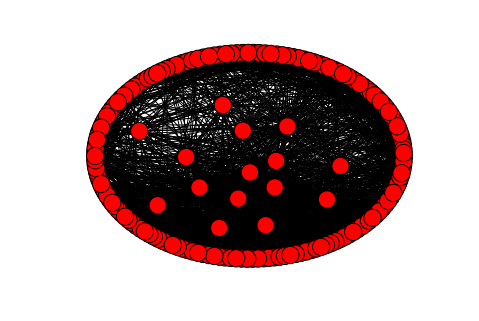

In [228]:
import networkx as nx

FG = nx.Graph(pc > .01)

labels = dict(enumerate(fc))
FG = nx.relabel_nodes(FG,labels)


pos = nx.spring_layout(FG, k = 0.6, iterations = 1000)
nx.draw(FG,pos)
nx.write_gexf(FG,'corr.gexf')